In [1]:
from environment.models.simple import SimpleEnv

import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from tensorflow import keras # type: ignore

env = SimpleEnv()

2024-05-28 10:06:57.804837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 10:06:57.996792: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


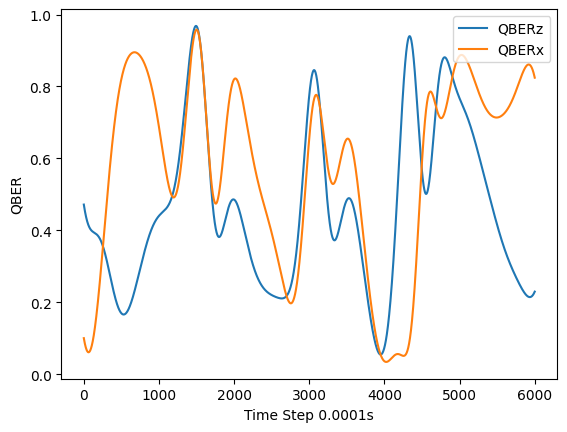

In [3]:
env.simulate(reset=False)

QBER = env.get_qber()
PHI = env.get_phi()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

In [4]:
split = .8
train_test_margin = .1
# Split the data into training and testing sets
phi_train = PHI[:int(len(PHI)*split)]
phi_test = PHI[int(len(PHI)*(split-train_test_margin)):]

QBERs_train = QBER[:int(len(QBER)*split)]
QBERs_test = QBER[int(len(QBER)*(split-train_test_margin)):]

# DNN on raw QBER

In [5]:
# define how many variables
num_inputs = 2

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(num_inputs,)),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(12, activation='linear')
])
model.compile(optimizer=keras.optimizers.Adam(), loss='mean_squared_error')

# Train the neural network
model.fit(QBERs_train[:,:], phi_train[:,:12], epochs=20)

# Predict the QBER using the trained neural network
phi_preds = model.predict(QBERs_test[:,:])

# Convert the predicted_phi_move to a numpy array
phi_preds = np.array(phi_preds)

Epoch 1/20


2024-04-04 08:54:24.277470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


50/50 [==============================] - 0s 2ms/step - loss: 0.6118
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1191
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.0520
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0360
Epoch 8/20
50/50 [==============================] - 0s 1ms/step - loss: 0.0324
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.0275
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 11/20
50/50 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 12/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 13/20
50/50 [==============================] - 0s 2ms/

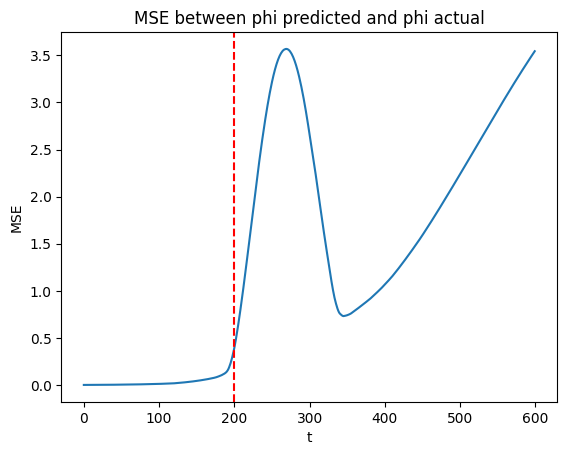

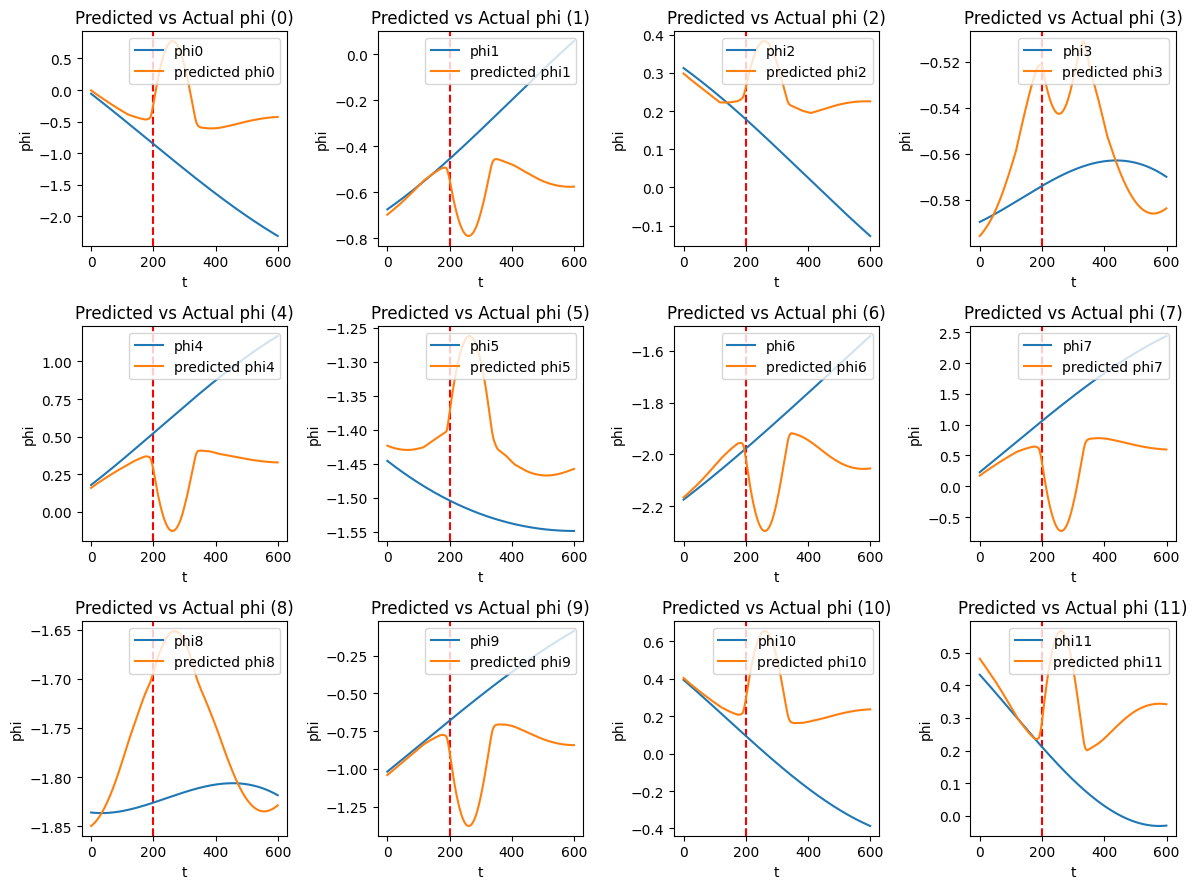

In [6]:


# Plot the MSE
mse_values = []

for i in range(len(phi_preds)):
    mse = np.mean((phi_preds[i][0] - phi_test[i][0]) ** 2)
    mse_values.append(mse)

plt.plot(mse_values)
plt.axvline(x=len(PHI) * 0.1, color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('MSE')
plt.title('MSE between phi predicted and phi actual')
plt.show()

phi_plot = np.array(PHI)
phi_test = np.array(phi_test)
phi_preds = np.array(phi_preds)

fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i in range(12):
    row = i // 4
    col = i % 4
    # axs[row, col].plot(QBER[4:,0],label='QBERz')
    # axs[row, col].plot(QBER[4:,1],label='QBERx')
    # axs[row, col].legend(loc = 'upper right')
    # axs[row, col].set_title(f'Error at angle {i}')
    # axs[row, col].set_ylabel('QBER')
    # axs[row, col].set_xlabel(f'Time Step {env.delta_t}s')
    # axs[row, col].set_ylim([-0.05, 1])  # Set y-axis limits here
    axs[row, col].axvline(x=len(PHI) * 0.1, color='red', linestyle='--')

    axs[row, col].plot(phi_test[:,i], label=f'phi{i}')
    axs[row, col].plot(phi_preds[:,i], label=f'predicted phi{i}')
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('phi')
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(f'Predicted vs Actual phi ({i})')

plt.tight_layout()
plt.show()


# DNN on FFT

In [5]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

from environment.models.simple_control_fixed import SimpleControlledFixedEnv

env = SimpleControlledFixedEnv()

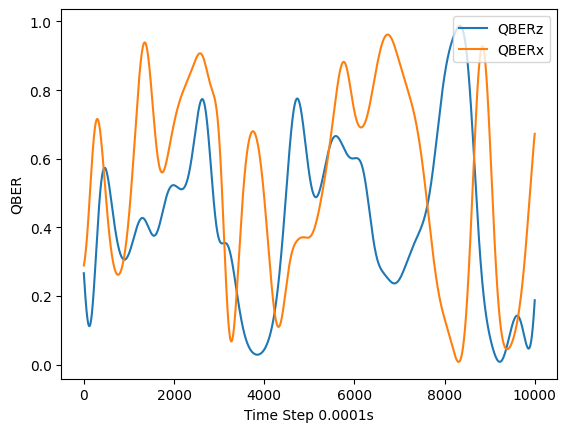

In [6]:
env.max_t = 1
env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

In [9]:
# QBER = np.load('data/QBER_100.npy')

In [7]:
QBER_fft = np.fft.rfft(QBER)

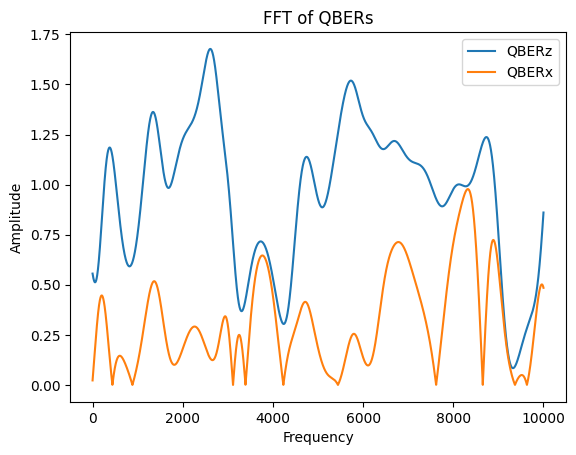

In [8]:
QBER_fft = np.fft.rfft(QBER[:,:])
z_fft = QBER_fft[:,0]
x_fft = QBER_fft[:,1]

plt.plot(np.abs(z_fft))
plt.plot(np.abs(x_fft))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of QBERs')
plt.legend(['QBERz', 'QBERx'])
plt.show()


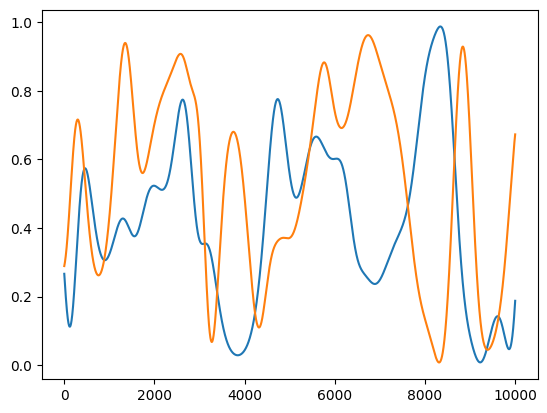

In [9]:
QBER_inverse_fft = np.fft.irfft(QBER_fft)
# print(QBER_inverse_fft[0,0])
# print(z_fft)

plt.plot(QBER_inverse_fft)
plt.show()

# Simple signal reconstruction

In [7]:
import cmath
import numpy as np # type: ignore

import matplotlib.pyplot as plt # type: ignore

# Define the parameters for the sine waves
amplitude_1 = 1.0
frequency_1 = 1.0
phase_1 = 0.0

amplitude_2 = 0.5
frequency_2 = 2.0
phase_2 = np.pi/2

amplitude_3 = 0.3
frequency_3 = 3.0
phase_3 = np.pi

# Generate the time array
t = np.linspace(0, 2*np.pi, 100)

# Generate the individual sine waves
sine_wave_1 = amplitude_1 * np.sin(frequency_1 * t + phase_1)
sine_wave_2 = amplitude_2 * np.sin(frequency_2 * t + phase_2)
sine_wave_3 = amplitude_3 * np.sin(frequency_3 * t + phase_3)

# Create the composite sine wave by adding the individual sine waves
composite = sine_wave_1 + sine_wave_2 + sine_wave_3

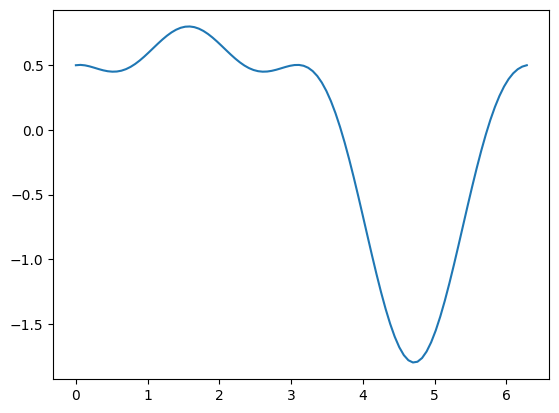

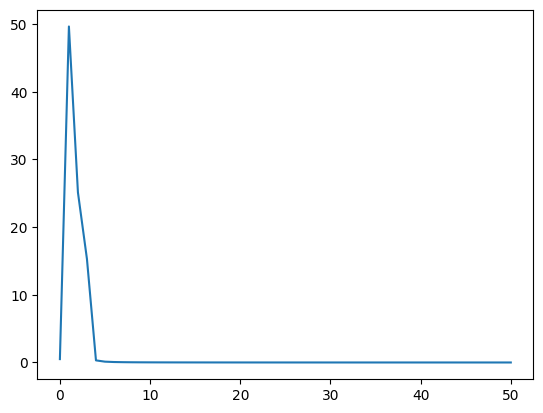

In [8]:
plt.plot(t, composite)
plt.show()
plt.plot(np.abs(np.fft.rfft(composite)))

In [9]:
# Define a function named "reconstruct" with input parameters: input, samples, time_steps, and threshold
def reconstruct(input, threshold=0.0):
    # Perform the Fast Fourier Transform (FFT) on the input
    fft3 = np.fft.rfft(input)
    
    # Create an array of evenly spaced values from 0 to time_steps with a step size of 1/samples
    x = np.linspace(0, len(input), len(input))

    # Calculate the frequencies corresponding to the FFT result
    freqs = np.fft.rfftfreq(len(x),.01)
    
    # Create an array to store the reconstructed signal
    recomb = np.zeros((len(x),))
    
    # Calculate the middle index of the frequencies
    middle = len(x)//2 - 1
    
    # Iterate over the frequencies
    for i in range(middle):
        # Check if the absolute value of the FFT coefficient is greater than the threshold
        if abs(fft3[i])/(len(x)) > threshold:
            # Set the coefficient for the first frequency to 2, otherwise set it to 1
            if i == 0:
                coeff = 2
            else:
                coeff = 1
            
            # Calculate the sinusoid using the FFT coefficient, frequency, and time values
            sinusoid = 1/(len(x)*coeff/2)*(abs(fft3[i])*np.cos(freqs[i]*2*np.pi*x+cmath.phase(fft3[i])))
            
            # Add the sinusoid to the reconstructed signal
            recomb += sinusoid
            
            # Plot the sinusoid
            plt.plot(x,sinusoid)
    
    # Add a legend to the plot with labels for each sinusoid
    plt.legend([f'Sin {i}' for i in range(middle)])
    
    # Display the plot
    plt.show()
    
    # Plot the reconstructed signal and the original input signal
    plt.plot(x,recomb,x,input)
    
    # Add a legend to the plot with labels for the reconstructed and original signals
    plt.legend(['reconstructed','original'])
    
    # Display the plot
    plt.show()

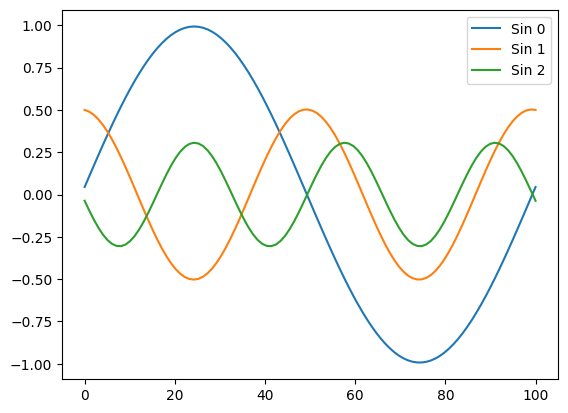

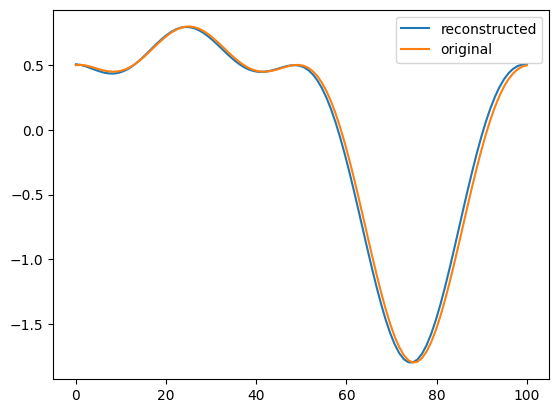

In [10]:
reconstruct(composite, threshold=0.1, )

# IFFT on singular phi move

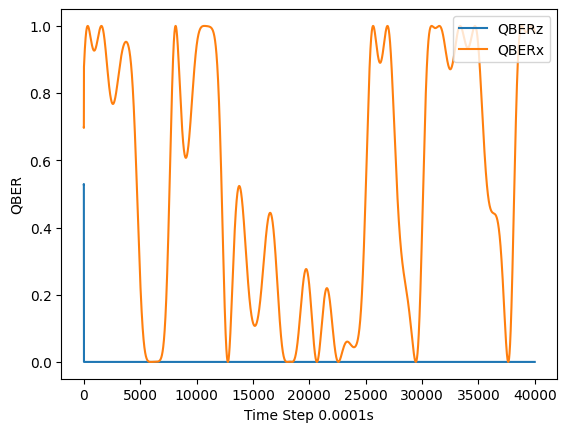

In [11]:
env.max_t = 4
env.reset()
env.fixed_errors_flags = [False, True, True, True, True, True, True, True, True, True, True, True]

while not env.done:
    env.step()

QBER = env.get_qber()
PHI = env.get_phi()
T = env.get_info()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

[21167.71633259   +0.j          5480.95670577+1221.2293019j
 -2580.01577536 +573.19114074j ...  2158.62279874 -189.29162541j
 -2580.01577536 -573.19114074j  5480.95670577-1221.2293019j ]


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


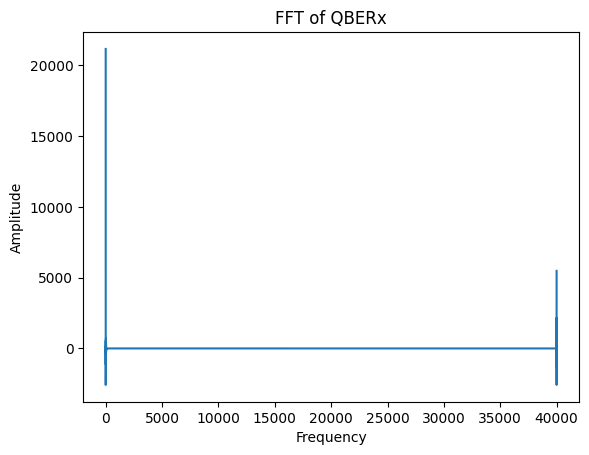

In [12]:
fft = np.fft.fft(QBER[:, 1])
print(fft)
# Plot the rfft values
plt.plot(fft)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of QBERx')
plt.show()

In [13]:
n = -1  # number of highest amplitudes to select
freqs = np.fft.fftfreq(len(fft), env.delta_t)

# Get the indices of the sorted amplitudes in descending order
sorted_top_indices = np.argsort(fft)[::-1]

# Select the top n amplitudes
top_n_amplitudes = fft[sorted_top_indices[:n]]

# Print the top n amplitudes
# print(top_n_amplitudes)

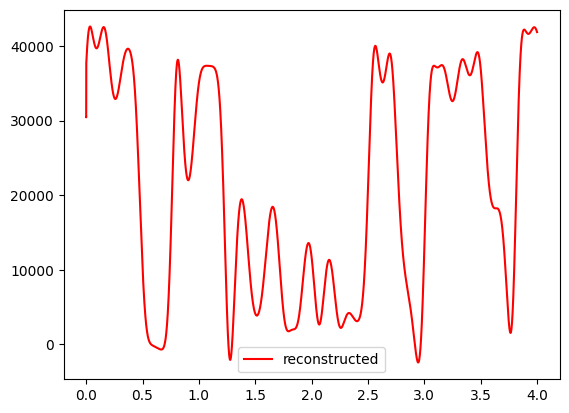

In [14]:
reconstructed_signal = np.zeros_like(fft)

Fs = env.delta_t  # sampling rate
N = len(fft)  # number of samples

# time vector
x = np.linspace(0.0, N * Fs, N, endpoint=False)

for i in sorted_top_indices[:n]:
    amplitude = abs(fft[i])
    phase = cmath.phase(fft[i])
    sinusoid = amplitude * np.cos(freqs[i]*2*np.pi*x + phase)
    # plt.plot(x, sinusoid)
    reconstructed_signal += sinusoid

plt.plot(x, reconstructed_signal, 'r', label='reconstructed')
plt.legend()
plt.show()

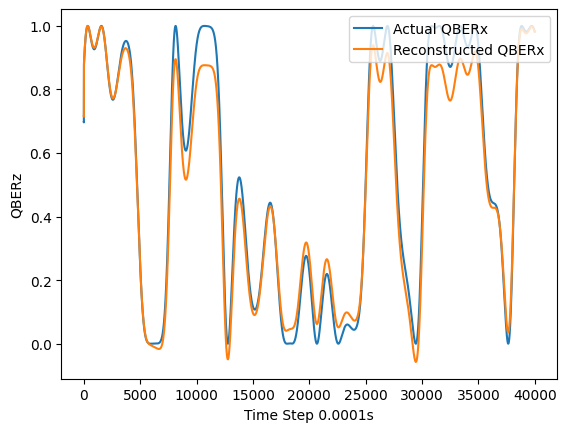

In [15]:
plt.plot(QBER[:, 1], label='Actual QBERx')
plt.plot(reconstructed_signal/max(reconstructed_signal), label='Reconstructed QBERx')
plt.legend(loc='upper right')
plt.ylabel('QBERz')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()


# DNN FFT one angle

In [16]:
fft = np.fft.fft(QBER)
y = np.array(env.phi[0].params_x).reshape(1,-1)
y = np.repeat(y, len(QBER), axis=0)
print(y.shape) # (8, 40000)

(40000, 8)


In [17]:
from tensorflow import keras # type: ignore
import tensorflow as tf # type: ignore
from tensorflow import sin, cos # type: ignore

num_inputs = 2

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(num_inputs,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(8, activation='linear')
])

def custom_loss(y_true, y_pred):
    # # Calculate the loss using ladybug's formula
    # [ax1, kx1, ax2, kx2, ax3, kx3, ax4, kx4] = tf.unstack(y_pred, axis=-1)
    # pred = ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5))
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    # Return the mean of the loss
    return loss

model.compile(optimizer=keras.optimizers.Adam(), loss=custom_loss)

model.fit(fft, y, epochs=3)


Epoch 1/3


2024-04-04 12:29:09.491725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1250/1250 [==============================] - 2s 2ms/step - loss: 0.0248
Epoch 2/3
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0021
Epoch 3/3
1250/1250 [==============================] - 2s 1ms/step - loss: 3.6763e-04


In [18]:
env.max_t = 5
env.reset()
T = []
while not env.done:
    env.step()
    T.append(env.get_info())

QBER = env.get_qber()
PHI = env.get_phi()

In [19]:
qb_test = QBER[len(fft):]
phi_test = PHI[len(fft):]
T_test = T[len(fft):]

preds = model.predict(np.fft.fft(qb_test))

  1/313 [..............................] - ETA: 16s

313/313 [==============================] - 0s 828us/step


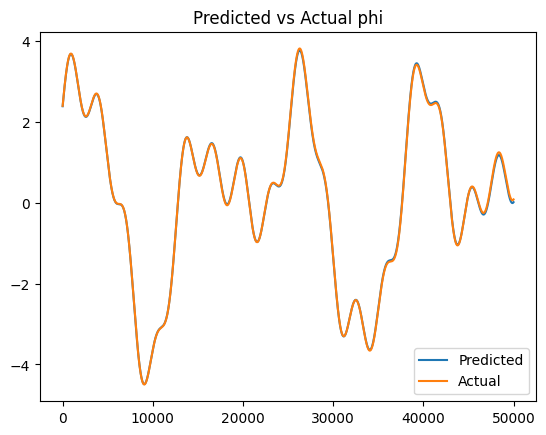

In [20]:
[ax1, ax2, ax3, ax4, kx1, kx2, kx3, kx4] = preds[0]
phi_pred = []
for i in range(len(QBER)):
    t = i * env.delta_t
    phi_pred.append(ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5)))
plt.title('Predicted vs Actual phi')
plt.plot(phi_pred)
plt.plot(PHI[:,0])
plt.legend(['Predicted', 'Actual'])
plt.show()


# DNN FFT two angles

In [27]:
from tensorflow import keras # type: ignore
from tensorflow import sin, cos # type: ignore

In [28]:
num_inputs = 2
phis_to_predict = 2

phi_models = []
for i in range(phis_to_predict):
    # Define the architecture of the neural network
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(num_inputs,)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(8, activation='linear')
    ])

    def custom_loss(y_true, y_pred):
        # # Calculate the loss using ladybug's formula
        # [ax1, kx1, ax2, kx2, ax3, kx3, ax4, kx4] = tf.unstack(y_pred, axis=-1)
        # pred = ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5))
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
        # Return the mean of the loss
        return loss

    model.compile(optimizer=keras.optimizers.Adam(), loss=custom_loss)
    phi_models.append(model)

In [29]:
env.max_t = 5
env.fixed_errors_flags = [False, True, True, True,
                          False, True, True, True,
                          True,  True, True, True]
env.reset()
T = []
while not env.done:
    env.step()
    T.append(env.get_info())

QBER = env.get_qber()
PHI = env.get_phi()

In [30]:
# indices of env.fixed_errors_flags that are False
phi_indices = [i for i, x in enumerate(env.fixed_errors_flags) if not x]
print(phi_indices)

[0, 4]


In [31]:
fft = np.fft.fft(QBER)
ys = []
for i in phi_indices:
    y = np.array(env.phi[i].params_x).reshape(1,-1)
    y = np.repeat(y, len(QBER), axis=0)
    ys.append(y)

In [32]:
for i in range(len(phi_models)):
    phi_models[i].fit(fft, ys[i], epochs=2)

Epoch 1/2
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0445
Epoch 2/2
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0048
Epoch 1/2
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0121
Epoch 2/2
1563/1563 [==============================] - 3s 2ms/step - loss: 3.5001e-04


In [33]:
phi_preds = []
for i in range(2):
    phi_preds.append(np.array(phi_models[i].predict(fft)))

1563/1563 [==============================] - 1s 812us/step


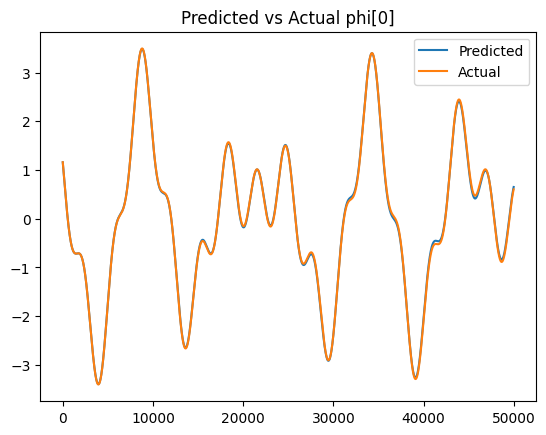

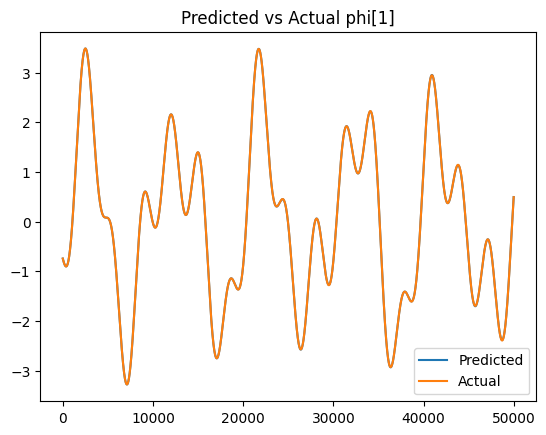

In [34]:
for i in range(len(phi_preds)):
    [ax1, ax2, ax3, ax4, kx1, kx2, kx3, kx4] = phi_preds[i][0]
    phi_pred = []
    for j in range(len(QBER)):
        t = j * env.delta_t
        phi_pred.append(ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5)))
    plt.title(f'Predicted vs Actual phi[{i}]')
    plt.plot(phi_pred)
    plt.plot(PHI[:,phi_indices[i]])
    plt.legend(['Predicted', 'Actual'])
    plt.show()

# DNN FFT all angles

In [11]:
num_inputs = 2
phis_to_predict = 12

phi_models = []
for i in range(phis_to_predict):
    # Define the architecture of the neural network
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(num_inputs,)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(8, activation='linear')
    ])

    def custom_loss(y_true, y_pred):
        # # Calculate the loss using ladybug's formula
        # [ax1, kx1, ax2, kx2, ax3, kx3, ax4, kx4] = tf.unstack(y_pred, axis=-1)
        # pred = ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5))
        loss = tf.reduce_mean(tf.square(y_true - y_pred))
        # Return the mean of the loss
        return loss

    model.compile(optimizer=keras.optimizers.Adam(), loss=custom_loss)
    phi_models.append(model)

2024-05-28 10:08:18.362106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
env.max_t = 2
env.fixed_errors_flags = [False, False, False, False,
                          False, False, False, False,
                          False,  False, False, False]
env.reset()
T = []
while not env.done:
    env.step()
    T.append(env.get_info())

QBER = env.get_qber()
PHI = env.get_phi()

In [13]:
# indices of env.fixed_errors_flags that are False
phi_indices = [i for i, x in enumerate(env.fixed_errors_flags) if not x]
print(phi_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [14]:
fft = np.fft.fft(QBER)
ys = []
for i in phi_indices:
    y = np.array(env.phi[i].params_x).reshape(1,-1)
    y = np.repeat(y, len(QBER), axis=0)
    ys.append(y)

In [15]:
for i in range(len(phi_models)):
    phi_models[i].fit(fft, ys[i], epochs=3)

Epoch 1/3
626/626 [==============================] - 2s 2ms/step - loss: 0.0150
Epoch 2/3
626/626 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 3/3
626/626 [==============================] - 1s 2ms/step - loss: 8.6210e-04
Epoch 1/3
626/626 [==============================] - 1s 2ms/step - loss: 0.0083
Epoch 2/3
626/626 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 3/3
626/626 [==============================] - 1s 2ms/step - loss: 5.9055e-04
Epoch 1/3
626/626 [==============================] - 2s 2ms/step - loss: 0.0100
Epoch 2/3
626/626 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 3/3
626/626 [==============================] - 1s 2ms/step - loss: 4.5282e-04
Epoch 1/3
626/626 [==============================] - 2s 2ms/step - loss: 0.0744
Epoch 2/3
626/626 [==============================] - 1s 2ms/step - loss: 0.0083
Epoch 3/3
626/626 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 1/3
626/626 [=========

In [16]:
phi_preds = []
for i in range(12):
    phi_preds.append(np.array(phi_models[i].predict(fft)))

626/626 [==============================] - 0s 730us/step


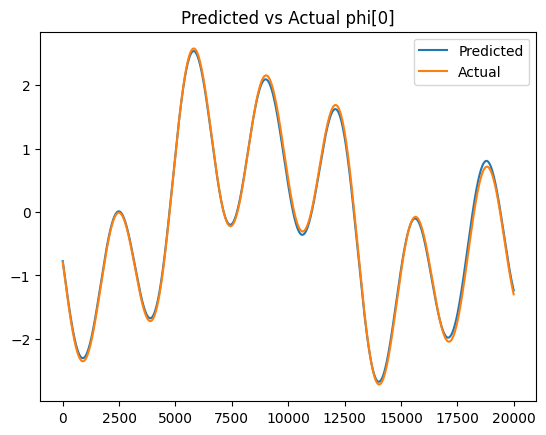

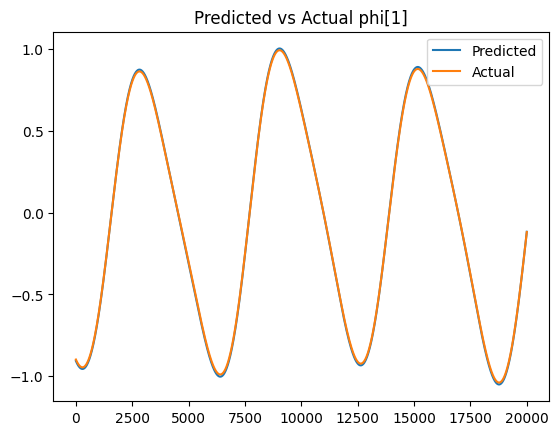

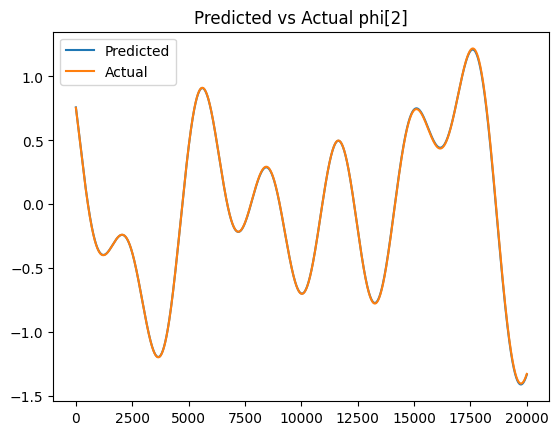

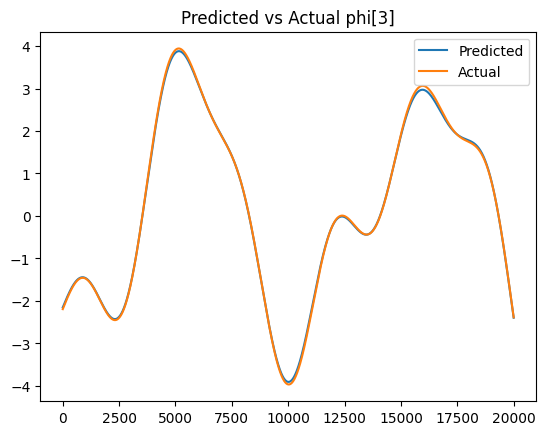

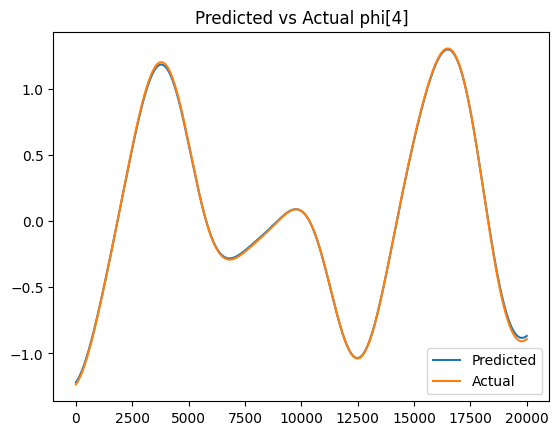

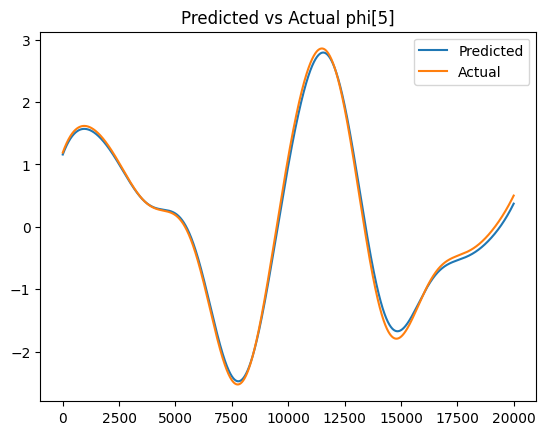

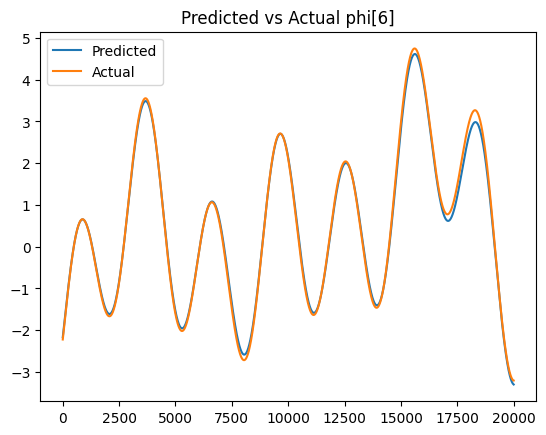

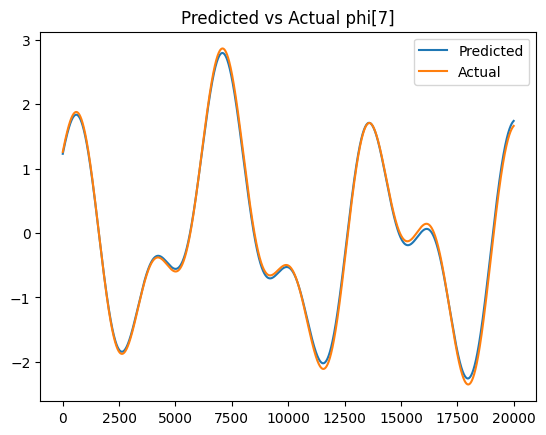

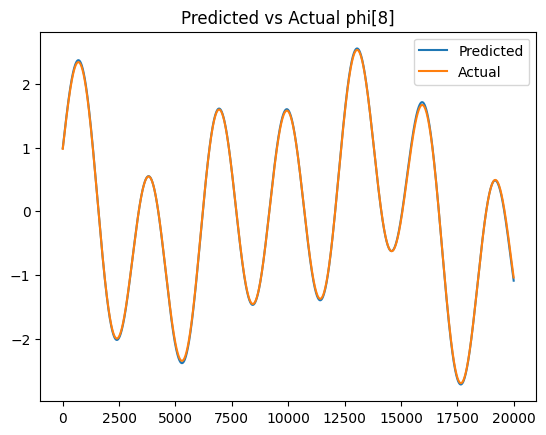

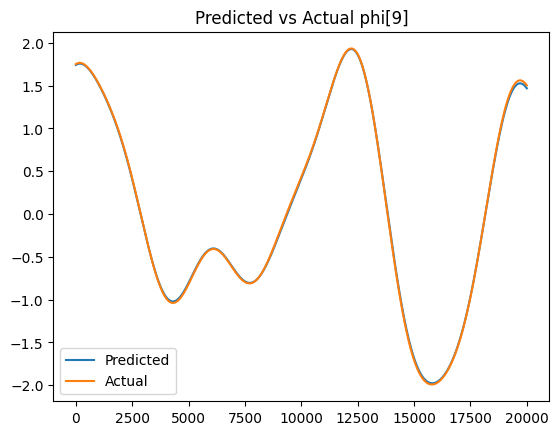

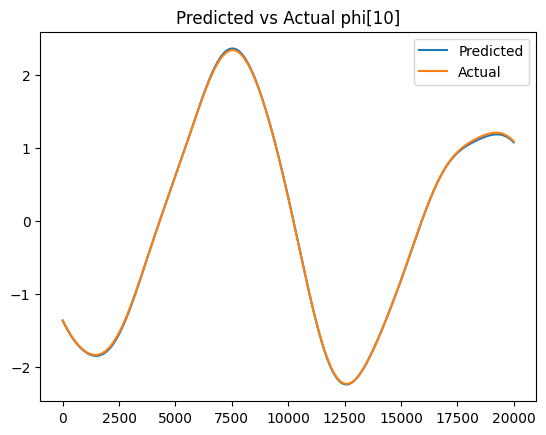

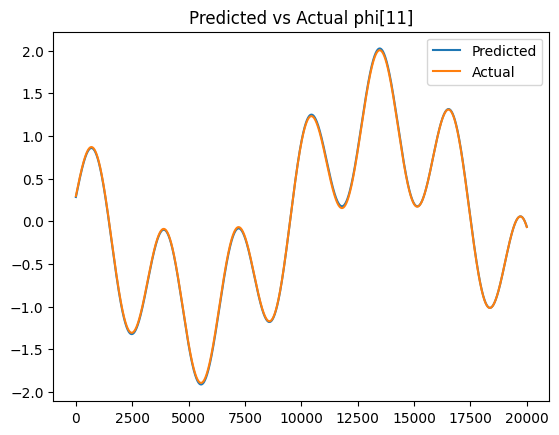

In [17]:
all_phi_preds = []
for i in range(len(phi_preds)):
    [ax1, ax2, ax3, ax4, kx1, kx2, kx3, kx4] = phi_preds[i][0]
    phi_pred = []
    for j in range(len(QBER)):
        t = j * env.delta_t
        phi_pred.append(ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5)))
    plt.title(f'Predicted vs Actual phi[{i}]')
    plt.plot(phi_pred)
    plt.plot(PHI[:,phi_indices[i]])
    plt.legend(['Predicted', 'Actual'])
    plt.show()
    
    all_phi_preds.append(phi_pred)

# Plot QBER vs Reconstructed

In [26]:
env.max_t = 2
env.fixed_errors_flags = [False, False, False, False,
                          False, False, False, False,
                          False,  False, False, False]
env.fixed_error_ctrl_pump = [0,0,0,0]
env.fixed_error_ctrl_alice = [0,0,0,0]
env.fixed_error_ctrl_bob = [0,0,0,0]
env.ctrl_alice = [0,0,0,0]
env.ctrl_bob = [0,0,0,0]
env.ctrl_pump = [0,0,0,0]
env.ctrl_alice_current = [0,0,0,0]
env.ctrl_bob_current = [0,0,0,0]
env.ctrl_pump_current = [0,0,0,0]
env.reset()
T = []
i = 0

for phi in env.phi:
    phi.params_x = phi_preds[i][0]
    i += 1

while not env.done:
    env.step()
    
reconstructed = env.get_qber()

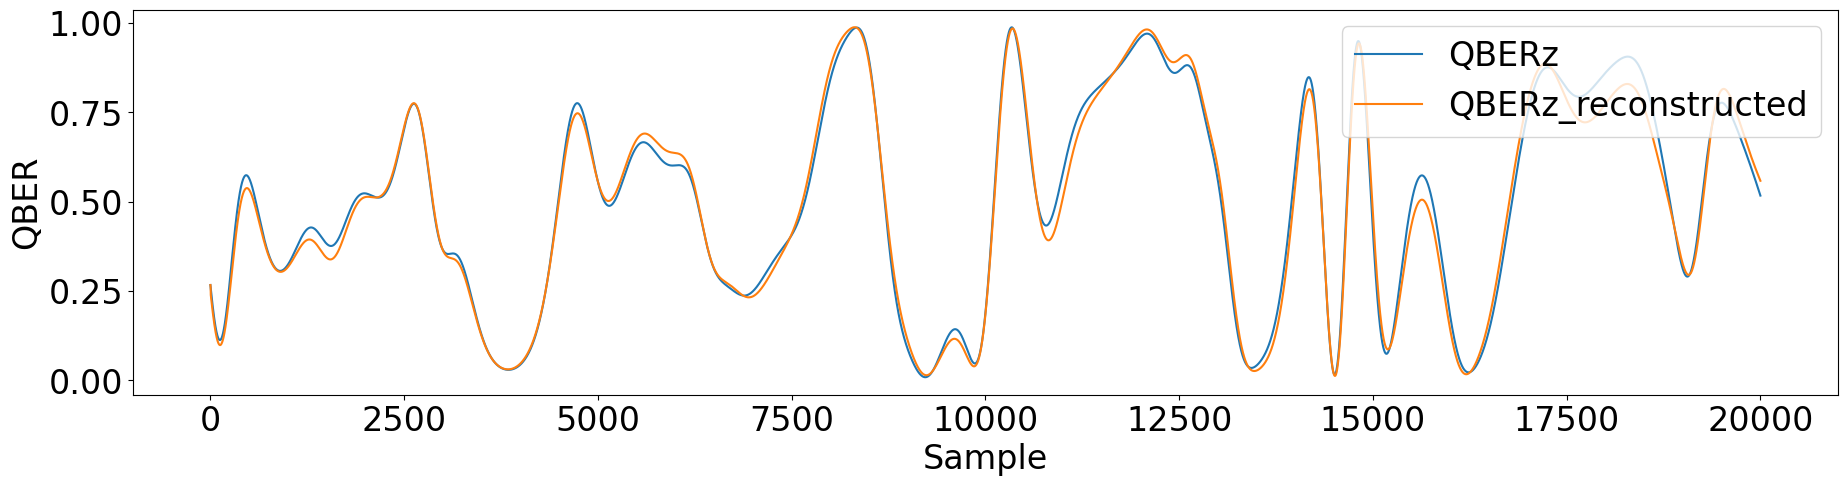

In [27]:
plt.figure(figsize=(22, 5))
plt.plot(QBER[:,0],label='QBERz')
plt.plot(reconstructed[:,0],label='QBERz_reconstructed')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel('Sample')
plt.rcParams['font.size'] = 24
plt.show()

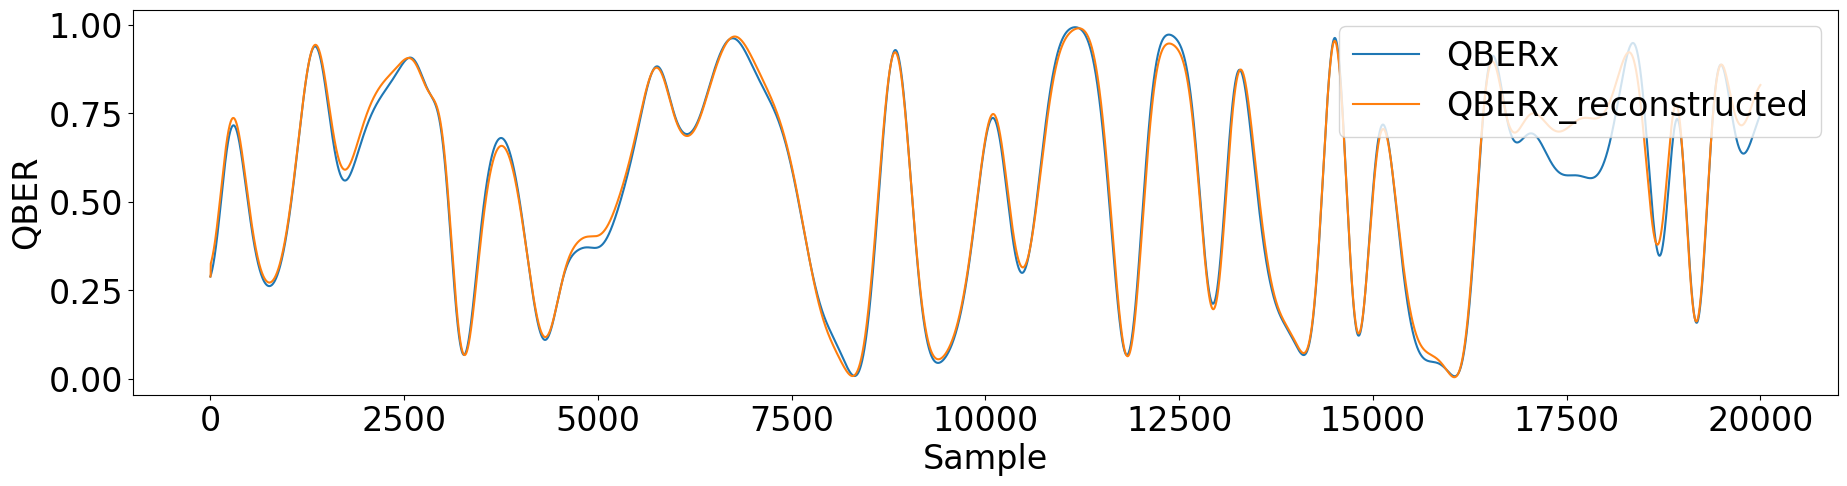

In [28]:
plt.figure(figsize=(22, 5))
plt.plot(QBER[:,1],label='QBERx')
plt.plot(reconstructed[:,1],label='QBERx_reconstructed')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel('Sample')
plt.rcParams['font.size'] = 24
plt.show()

# Inverse Control using Predicted Params

In [68]:
env.max_t = 1
env.fixed_errors_flags = [False, False, False, False,
                          False, False, False, False,
                          False,  False, False, False]
env.fixed_error_ctrl_pump = [0,0,0,0]
env.fixed_error_ctrl_alice = [0,0,0,0]
env.fixed_error_ctrl_bob = [0,0,0,0]
env.ctrl_alice = [0,0,0,0]
env.ctrl_bob = [0,0,0,0]
env.ctrl_pump = [0,0,0,0]
env.ctrl_alice_current = [0,0,0,0]
env.ctrl_bob_current = [0,0,0,0]
env.ctrl_pump_current = [0,0,0,0]
env.reset()
T = []
i = 0
while not env.done:
    # get current environment time
    t = env.get_info()
    
    phis = np.zeros(12)
    i = 0
    for phi_params in phi_preds:
        [ax1, ax2, ax3, ax4, kx1, kx2, kx3, kx4] = phi_params[i]
        phi = (ax1 * sin(t * (kx1 + 20)) + ax2 * cos(t * (kx2 + 10)) + ax3 * sin(t * (kx3 + 5)) + ax4 * cos(t * (kx4 + 5)))

        # add to action array
        phis[i] = phi
        i += 1
    # _move = []
    # for i in range(12):
    #     _move.append(env.phi[i].move(t))

    # unpack actions to pump, alice, and bob
    a_pump = phis[:4]
    a_alice = phis[4:8]
    a_bob = phis[8:]

    env.step(a_pump=a_pump, a_alice=a_alice, a_bob=a_bob)
    T.append(env.get_info())
    i += 1

QBER = env.get_qber()
PHI = env.get_phi()

In [81]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

# Get rid of initial QBER values ( no control )
# QBER = QBER[10:, :]

n = 10
# Calculate statistics for z QBER
qber_x_mean = np.mean(QBER[n:, 0])
qber_x_std = np.std(QBER[n:, 0])
qber_x_min = np.min(QBER[n:, 0])
qber_x_max = np.max(QBER[n:, 0])

# Create a dataframe to display the statistics for z QBER
qber_x_stats = pd.DataFrame({'Mean': [qber_x_mean], 'Standard Deviation': [qber_x_std], 'Minimum': [qber_x_min], 'Maximum': [qber_x_max]})

# Print the statistics for x QBER
print("Statistics for z QBER:")
print(qber_x_stats)

# Calculate statistics for x QBER
qber_z_mean = np.mean(QBER[n:, 1])
qber_z_std = np.std(QBER[n:, 1])
qber_z_min = np.min(QBER[n:, 1])
qber_z_max = np.max(QBER[n:, 1])

# Create a dataframe to display the statistics for x QBER
qber_z_stats = pd.DataFrame({'Mean': [qber_z_mean], 'Standard Deviation': [qber_z_std], 'Minimum': [qber_z_min], 'Maximum': [qber_z_max]})

# Print the statistics for z QBER
print("Statistics for x QBER:")
print(qber_z_stats)


Statistics for z QBER:
       Mean  Standard Deviation       Minimum   Maximum
0  0.000193            0.000189  1.628333e-07  0.001043
Statistics for x QBER:
       Mean  Standard Deviation   Minimum   Maximum
0  0.000162            0.000119  0.000001  0.000746


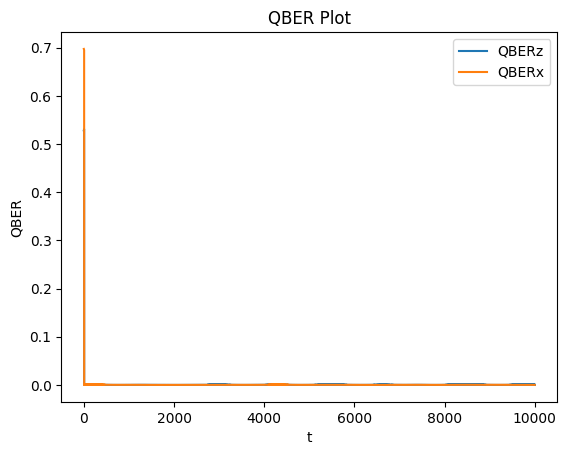

In [82]:
plt.plot(QBER)
plt.xlabel('t')
plt.ylabel('QBER')
plt.title('QBER Plot')
plt.legend(['QBERz', 'QBERx'])
plt.show()
